# Visualization of Illinois Census from 2010-2019


## Initialization

In [90]:
#import libraries
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
#read csv
df = pd.read_csv('SUB-IP-EST2019-ANNRES-17.csv')

In [92]:
df

,Geographic Area,Census(04/01/10),Estimates Base(04/01/10),2010(07/01),2011,2012,2013,2014,2015,2016,2017,2018,2019
0,"Abingdon city, Illinois",3319,3286,3285,3273,3242,3226,3212,3171,3141,3117,3073,3051
1,"Addieville village, Illinois",252,252,252,248,253,249,247,245,245,240,241,238
2,"Addison village, Illinois",36942,37084,37134,37319,37409,37493,37432,37339,37104,36946,36696,36482
3,"Adeline village, Illinois",85,85,85,84,84,83,82,82,81,81,80,80
4,"Albany village, Illinois",891,903,905,901,891,891,887,888,883,874,871,863
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,"Yale village, Illinois",86,86,86,86,86,85,85,85,85,84,85,85
1294,"Yates City village, Illinois",693,691,691,687,683,679,678,670,667,661,655,652
1295,"Yorkville city, Illinois",16921,16950,17053,17311,17555,17837,18181,18474,18860,19398,20092,20613
1296,"Zeigler city, Illinois",1801,1801,1803,1798,1789,1772,1766,1761,1745,1740,1722,1712


In [93]:
#check column types
df.dtypes

Geographic Area             object
Census(04/01/10)             int64
Estimates Base(04/01/10)     int64
2010(07/01)                  int64
2011                         int64
2012                         int64
2013                         int64
2014                         int64
2015                         int64
2016                         int64
2017                         int64
2018                         int64
2019                         int64
dtype: object

In [94]:
#create a new column and categorize areas into city as 1 and non_city as 0
df['City'] = df['2019'].copy()
for i in range(len(df)):
    if ('city' in df.loc[i, 'Geographic Area']):
        df['City'][i] = 1;
    else:
        df['City'][i] = 0;
    
df.sample(5)

,Geographic Area,Census(04/01/10),Estimates Base(04/01/10),2010(07/01),2011,2012,2013,2014,2015,2016,2017,2018,2019,City
295,"Deer Park village, Illinois",3200,3130,3133,3140,3140,3148,3157,3664,3656,3645,4250,4225,0
606,"Kincaid village, Illinois",1505,1506,1504,1498,1487,1468,1449,1431,1417,1407,1389,1372,0
688,"McCook village, Illinois",228,228,228,229,228,229,229,228,227,223,221,220,0
785,"Mount Auburn village, Illinois",480,482,483,482,482,478,473,467,466,461,456,450,0
1294,"Yates City village, Illinois",693,691,691,687,683,679,678,670,667,661,655,652,0


In [95]:
#create a new column and calculate net change from July 1st of 2010 to 2019
df['Net Change'] = df['City'].copy()
for i in range(len(df)):
    df.loc[i,'Net Change'] = df.loc[i,'2019'] - df.loc[i,'2010(07/01)']
    
df.sample(5)

,Geographic Area,Census(04/01/10),Estimates Base(04/01/10),2010(07/01),2011,2012,2013,2014,2015,2016,2017,2018,2019,City,Net Change
573,"Jerome village, Illinois",1656,1694,1695,1697,1691,1682,1676,1661,1645,1628,1608,1588,0,-107
973,"Red Bud city, Illinois",3698,3697,3696,3684,3637,3621,3604,3571,3547,3536,3528,3480,1,-216
906,"Papineau village, Illinois",171,167,167,165,164,162,158,157,155,153,151,149,0,-18
856,"Oakdale village, Illinois",221,210,210,209,209,208,207,205,204,202,202,200,0,-10
1120,"Stewardson village, Illinois",734,732,733,723,719,720,718,716,721,721,723,721,0,-12


In [96]:
#create a new column and calculate net change precent from July 1st of 2010 to 2019
df['Net Change %'] = df['Net Change'].copy()
for i in range(len(df)):
    df.loc[i,'Net Change %'] = (df.loc[i,'Net Change']/df.loc[i,'2010(07/01)'] * 100).round(2)
    
df.sample(5)

,Geographic Area,Census(04/01/10),Estimates Base(04/01/10),2010(07/01),2011,2012,2013,2014,2015,2016,2017,2018,2019,City,Net Change,Net Change %
84,"Belle Rive village, Illinois",361,360,359,359,358,358,355,356,356,354,350,350,0,-9,-2.51
458,"Good Hope village, Illinois",396,396,396,395,395,393,386,383,380,375,367,364,0,-32,-8.08
399,"Flat Rock village, Illinois",331,331,331,330,326,321,319,317,317,315,312,307,0,-24,-7.25
173,"Camden village, Illinois",86,86,86,85,85,84,83,81,80,81,80,78,0,-8,-9.30
1054,"Saybrook village, Illinois",693,693,693,692,694,701,691,688,683,679,673,668,0,-25,-3.61


In [97]:
#split df into two dataframes: city and non_city
city = df[df['City'] == 1]
non_city = df[df['City'] == 0]

In [98]:
city.sample(5)

,Geographic Area,Census(04/01/10),Estimates Base(04/01/10),2010(07/01),2011,2012,2013,2014,2015,2016,2017,2018,2019,City,Net Change,Net Change %
888,"Orient city, Illinois",358,358,358,358,357,354,354,351,349,348,345,343,1,-15,-4.19
574,"Jerseyville city, Illinois",8465,8464,8461,8455,8462,8522,8479,8384,8274,8257,8211,8200,1,-261,-3.08
1179,"Troy city, Illinois",9888,9949,9964,10000,10005,10044,10053,10083,10142,10232,10296,10375,1,411,4.12
424,"Galesburg city, Illinois",32195,32195,32180,32046,31784,31700,31590,31228,30930,30729,30368,30197,1,-1983,-6.16
1229,"Watseka city, Illinois",5255,5289,5286,5241,5198,5133,5085,5044,4976,4900,4839,4767,1,-519,-9.82


In [99]:
non_city.sample(5)

,Geographic Area,Census(04/01/10),Estimates Base(04/01/10),2010(07/01),2011,2012,2013,2014,2015,2016,2017,2018,2019,City,Net Change,Net Change %
276,"Cypress village, Illinois",234,234,235,235,236,235,235,234,236,235,235,235,0,0,0.00
938,"Plainfield village, Illinois",39581,39884,39994,40208,40515,41800,42137,42518,42941,43832,44084,44308,0,4314,10.79
311,"Dongola village, Illinois",726,724,722,721,717,715,708,703,696,690,685,678,0,-44,-6.09
103,"Big Rock village, Illinois",1126,1132,1133,1138,1140,1143,1149,1153,1152,1148,1139,1129,0,-4,-0.35
790,"Mount Morris village, Illinois",2998,3009,3003,2979,2958,2926,2903,2876,2849,2833,2812,2794,0,-209,-6.96


## Analysis

In [100]:
#top 5 most populous cities in 2019
city.nlargest(5, '2019')

,Geographic Area,Census(04/01/10),Estimates Base(04/01/10),2010(07/01),2011,2012,2013,2014,2015,2016,2017,2018,2019,City,Net Change,Net Change %
219,"Chicago city, Illinois",2695598,2695652,2697477,2708114,2719141,2725731,2727066,2724344,2716723,2711069,2701423,2693976,1,-3501,-0.13
54,"Aurora city, Illinois",197899,197975,198207,199150,199648,199803,200189,200315,200799,200391,199199,197757,1,-450,-0.23
804,"Naperville city, Illinois",141853,142170,142402,143205,144017,144892,146193,146975,147192,147619,148090,148449,1,6047,4.25
579,"Joliet city, Illinois",147433,147308,147524,147771,148084,147749,147592,147432,147802,147821,147730,147344,1,-180,-0.12
1002,"Rockford city, Illinois",152871,153285,153147,152129,151258,150608,149378,148465,147796,147008,146307,145609,1,-7538,-4.92


In [101]:
#top 5 most populous non-cities in 2019
non_city.nlargest(5,'2019')

,Geographic Area,Census(04/01/10),Estimates Base(04/01/10),2010(07/01),2011,2012,2013,2014,2015,2016,2017,2018,2019,City,Net Change,Net Change %
225,"Cicero town, Illinois",83891,84241,84267,84438,84569,84601,84397,83884,83219,82399,81477,80796,0,-3471,-4.12
36,"Arlington Heights village, Illinois",75101,75185,75252,75528,75918,76116,76145,75987,75795,75473,75116,74760,0,-492,-0.65
114,"Bolingbrook village, Illinois",73366,73365,73475,73789,73949,73909,74032,74142,74383,75003,75043,74545,0,1070,1.46
1056,"Schaumburg village, Illinois",74227,74233,74294,74551,74775,74911,74903,74651,74592,74039,73388,72887,0,-1407,-1.89
896,"Palatine village, Illinois",68557,68551,68611,68886,69170,69378,69427,69302,68953,68506,67942,67482,0,-1129,-1.65


In [102]:
#top 5 least populous cities in 2019
city.nsmallest(5,'2019')

,Geographic Area,Census(04/01/10),Estimates Base(04/01/10),2010(07/01),2011,2012,2013,2014,2015,2016,2017,2018,2019,City,Net Change,Net Change %
808,"Nason city, Illinois",236,236,235,235,237,236,235,234,235,234,233,233,1,-2,-0.85
888,"Orient city, Illinois",358,358,358,358,357,354,354,351,349,348,345,343,1,-15,-4.19
43,"Ashley city, Illinois",536,536,535,528,527,517,515,510,506,495,495,490,1,-45,-8.41
782,"Mound City city, Illinois",588,595,591,575,571,565,554,540,535,526,514,504,1,-87,-14.72
263,"Creal Springs city, Illinois",543,545,545,546,543,543,540,542,538,536,533,527,1,-18,-3.30


In [103]:
#top 5 least populous non-cities in 2019
non_city.nsmallest(5,'2019')

,Geographic Area,Census(04/01/10),Estimates Base(04/01/10),2010(07/01),2011,2012,2013,2014,2015,2016,2017,2018,2019,City,Net Change,Net Change %
594,"Kaskaskia village, Illinois",14,14,14,14,14,13,13,13,13,13,13,13,0,-1,-7.14
1189,"Valley City village, Illinois",13,13,13,13,13,13,13,13,12,12,13,13,0,0,0.00
1163,"Time village, Illinois",23,23,23,23,23,22,22,22,22,22,22,22,0,-1,-4.35
421,"Fults village, Illinois",26,26,26,26,26,26,26,26,26,28,25,28,0,2,7.69
95,"Bentley town, Illinois",35,35,35,35,35,34,34,33,33,33,33,33,0,-2,-5.71


In [104]:
#top 5 cities with most net gain
city.nlargest(5,'Net Change')

,Geographic Area,Census(04/01/10),Estimates Base(04/01/10),2010(07/01),2011,2012,2013,2014,2015,2016,2017,2018,2019,City,Net Change,Net Change %
206,"Champaign city, Illinois",81055,81246,81405,82330,83202,84112,84953,86218,87244,87839,87994,88909,1,7504,9.22
804,"Naperville city, Illinois",141853,142170,142402,143205,144017,144892,146193,146975,147192,147619,148090,148449,1,6047,4.25
1295,"Yorkville city, Illinois",16921,16950,17053,17311,17555,17837,18181,18474,18860,19398,20092,20613,1,3560,20.88
360,"Elmhurst city, Illinois",44121,44136,44199,44983,45256,45621,45809,46007,46523,46626,46489,46746,1,2547,5.76
350,"Elgin city, Illinois",108188,108219,108388,109225,109710,110149,111059,111992,112265,112103,111490,110849,1,2461,2.27


In [105]:
#top 5 cities with most net loss
city.nsmallest(5,'Net Change')

,Geographic Area,Census(04/01/10),Estimates Base(04/01/10),2010(07/01),2011,2012,2013,2014,2015,2016,2017,2018,2019,City,Net Change,Net Change %
1002,"Rockford city, Illinois",152871,153285,153147,152129,151258,150608,149378,148465,147796,147008,146307,145609,1,-7538,-4.92
291,"Decatur city, Illinois",76122,76131,76105,75922,75449,74955,74155,73265,72510,71790,71136,70746,1,-5359,-7.04
921,"Peoria city, Illinois",115007,115150,114980,115426,115798,116646,115955,115183,114227,112618,111449,110417,1,-4563,-3.97
219,"Chicago city, Illinois",2695598,2695652,2697477,2708114,2719141,2725731,2727066,2724344,2716723,2711069,2701423,2693976,1,-3501,-0.13
85,"Belleville city, Illinois",44478,44301,44288,43922,43503,43036,42679,42235,41873,41683,41341,40897,1,-3391,-7.66


In [106]:
#top 5 non-cities with most net gain
non_city.nlargest(5,'Net Change')

,Geographic Area,Census(04/01/10),Estimates Base(04/01/10),2010(07/01),2011,2012,2013,2014,2015,2016,2017,2018,2019,City,Net Change,Net Change %
892,"Oswego village, Illinois",30355,30452,30659,31232,31806,32339,33238,33956,34463,34837,35183,36252,0,5593,18.24
934,"Pingree Grove village, Illinois",4532,4518,4587,4713,4910,5471,5885,6648,7408,8097,8936,9874,0,5287,115.26
938,"Plainfield village, Illinois",39581,39884,39994,40208,40515,41800,42137,42518,42941,43832,44084,44308,0,4314,10.79
550,"Huntley village, Illinois",24291,24312,24373,24609,24918,25451,25871,26318,26607,27063,27377,27228,0,2855,11.71
1210,"Volo village, Illinois",2929,2916,2988,3224,3528,3902,4263,4766,5206,5465,5578,5813,0,2825,94.54


In [107]:
#top 5 non-cities with most net loss
non_city.nsmallest(5,'Net Change')

,Geographic Area,Census(04/01/10),Estimates Base(04/01/10),2010(07/01),2011,2012,2013,2014,2015,2016,2017,2018,2019,City,Net Change,Net Change %
225,"Cicero town, Illinois",83891,84241,84267,84438,84569,84601,84397,83884,83219,82399,81477,80796,0,-3471,-4.12
1086,"Skokie village, Illinois",64784,64845,64889,65087,65247,65328,65223,64888,64437,63847,63171,62700,0,-2189,-3.37
861,"Oak Lawn village, Illinois",56690,56690,56732,56924,57078,57170,57106,56825,56456,55983,55430,55022,0,-1710,-3.01
1056,"Schaumburg village, Illinois",74227,74233,74294,74551,74775,74911,74903,74651,74592,74039,73388,72887,0,-1407,-1.89
792,"Mount Prospect village, Illinois",54167,55037,55082,55264,55417,55602,55770,55528,55156,54675,54116,53719,0,-1363,-2.47


In [108]:
#top 5 cities with most net gain by percent
city.nlargest(5,'Net Change %')

,Geographic Area,Census(04/01/10),Estimates Base(04/01/10),2010(07/01),2011,2012,2013,2014,2015,2016,2017,2018,2019,City,Net Change,Net Change %
1295,"Yorkville city, Illinois",16921,16950,17053,17311,17555,17837,18181,18474,18860,19398,20092,20613,1,3560,20.88
777,"Morris city, Illinois",13636,13639,13666,13697,13777,13880,14059,14265,14400,14656,14912,15053,1,1387,10.15
206,"Champaign city, Illinois",81055,81246,81405,82330,83202,84112,84953,86218,87244,87839,87994,88909,1,7504,9.22
249,"Columbia city, Illinois",9707,9698,9725,9825,9880,9987,10070,10152,10232,10313,10428,10513,1,788,8.10
1224,"Washington city, Illinois",15134,15231,15280,15452,15525,15742,15639,16461,16661,16672,16570,16516,1,1236,8.09


In [109]:
#top 5 cities with most net loss by percent
city.nsmallest(5,'Net Change %')

,Geographic Area,Census(04/01/10),Estimates Base(04/01/10),2010(07/01),2011,2012,2013,2014,2015,2016,2017,2018,2019,City,Net Change,Net Change %
165,"Cairo city, Illinois",2831,2831,2819,2742,2657,2619,2564,2446,2335,2270,2184,2082,1,-737,-26.14
136,"Brookport city, Illinois",984,980,976,970,954,938,881,870,868,859,840,826,1,-150,-15.37
783,"Mounds city, Illinois",810,810,805,784,781,771,757,737,727,715,700,684,1,-121,-15.03
782,"Mound City city, Illinois",588,595,591,575,571,565,554,540,535,526,514,504,1,-87,-14.72
1068,"Shawneetown city, Illinois",1239,1244,1241,1224,1202,1201,1178,1164,1150,1130,1123,1077,1,-164,-13.22


In [110]:
#top 5 non-cities with most net gain by percent
non_city.nlargest(5,'Net Change %')

,Geographic Area,Census(04/01/10),Estimates Base(04/01/10),2010(07/01),2011,2012,2013,2014,2015,2016,2017,2018,2019,City,Net Change,Net Change %
934,"Pingree Grove village, Illinois",4532,4518,4587,4713,4910,5471,5885,6648,7408,8097,8936,9874,0,5287,115.26
1210,"Volo village, Illinois",2929,2916,2988,3224,3528,3902,4263,4766,5206,5465,5578,5813,0,2825,94.54
295,"Deer Park village, Illinois",3200,3130,3133,3140,3140,3148,3157,3664,3656,3645,4250,4225,0,1092,34.85
452,"Godley village, Illinois",601,601,602,628,643,666,677,693,710,726,738,756,0,154,25.58
171,"Cambria village, Illinois",1228,1229,1229,1255,1265,1265,1265,1271,1276,1270,1273,1463,0,234,19.04


In [111]:
#top 5 non-cities with most net loss by percent
non_city.nsmallest(5,'Net Change %')

,Geographic Area,Census(04/01/10),Estimates Base(04/01/10),2010(07/01),2011,2012,2013,2014,2015,2016,2017,2018,2019,City,Net Change,Net Change %
1146,"Tamms village, Illinois",632,1045,1043,1025,972,588,575,549,526,512,494,472,0,-571,-54.75
1154,"Thebes village, Illinois",436,437,435,424,411,403,395,377,360,350,337,321,0,-114,-26.21
330,"East Cape Girardeau village, Illinois",385,387,385,375,364,359,352,336,321,312,300,286,0,-99,-25.71
687,"McClure village, Illinois",402,402,400,390,378,373,365,349,335,326,313,301,0,-99,-24.75
962,"Pulaski village, Illinois",206,206,205,198,197,195,192,187,185,182,179,175,0,-30,-14.63


## Graph

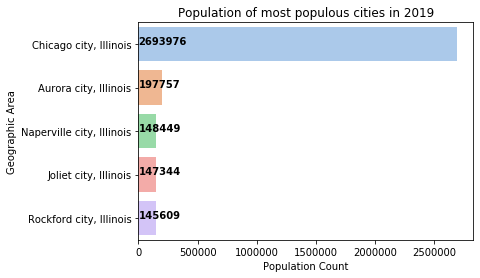

In [112]:
year = city.nlargest(5,'2019')['2019']
place = city.nlargest(5,'2019')['Geographic Area']
sns.barplot(x=year, y=place, data=city.nlargest(5,'2019'),palette='pastel')
plt.title('Population of most populous cities in 2019')
plt.xlabel('Population Count')
for i,j in enumerate(city.nlargest(5,'2019')['2019']):
    plt.text(0.5,i, j, weight='bold', color='black')
plt.show()

## Summary